<a href="https://colab.research.google.com/github/LeeDongN/Medica_AI2/blob/main/ML_analyze_XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
from xgboost import plot_tree
import os
import sklearn
from google.colab import drive
from scipy.signal import find_peaks
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

drive.mount('/content/drive')
path = '/content/drive/My Drive/data/'
data = np.load("/content/drive/MyDrive/extracted_data/new_data_5.npy")
label = np.load("/content/drive/MyDrive/extracted_data/new_label_5.npy")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# data analays

In [23]:
label_count = np.count_nonzero(label == 4)
print(len(label))
print(label_count)
print(label_count/len(label)*100)

251
144
57.37051792828686


# XGboost

In [24]:
#train 변수 나누기
X_train, X_test, y_train, y_test= train_test_split(data, label,test_size=0.3, random_state=123)
xg_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimators=20, seed=123)
xg_cl.fit(X_train, y_train)
#예측하기
preds = xg_cl.predict(X_test)
#정확도
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.921053


# checking the accuracy of each label

## before oversampling

In [25]:
from sklearn.metrics import confusion_matrix

# Evaluate the KNN classifier
accuracy = xg_cl.score(X_test, y_test)

# Predict labels for the test set
y_pred = xg_cl.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"-----------------------------------Accuracy before Oversampling-----------------------------------")
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy for each class
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

for i, acc in enumerate(class_accuracy):
    print(f"Accuracy for class {i}: {acc:.2f}")

-----------------------------------Accuracy before Oversampling-----------------------------------
Accuracy: 0.9210526315789473
Confusion Matrix:
[[ 1  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  1 17  2  1]
 [ 0  0  2  2  0]
 [ 0  0  0  0 48]]
Accuracy for class 0: 1.00
Accuracy for class 1: 1.00
Accuracy for class 2: 0.81
Accuracy for class 3: 0.50
Accuracy for class 4: 1.00


## after oversampling

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

# Apply SMOTE oversampling
X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X_train, y_train)

# Train the KNN classifier with SMOTE oversampled data
xg_cl.fit(X_resampled_smote, y_resampled_smote)

# Evaluate the KNN classifier with SMOTE oversampled data
y_pred_smote = xg_cl.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print("Overall Accuracy with SMOTE:", accuracy_smote)

# Display class distribution after SMOTE oversampling
print("Class distribution after SMOTE:", sorted(Counter(y_resampled_smote).items()))

# Calculate accuracy for each class with SMOTE oversampled data
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_accuracy_smote = conf_matrix_smote.diagonal() / conf_matrix_smote.sum(axis=1)
print("Accuracy for each class with SMOTE oversampling:")
for i, acc in enumerate(class_accuracy_smote):
    print(f"Class {i}: {acc:.2f}")

# Calculate the confusion matrix with SMOTE oversampled data

print("Confusion Matrix with SMOTE:")
print(conf_matrix_smote)

Overall Accuracy with SMOTE: 0.868421052631579
Class distribution after SMOTE: [(0, 96), (1, 96), (2, 96), (3, 96), (4, 96)]
Accuracy for each class with SMOTE oversampling:
Class 0: 1.00
Class 1: 1.00
Class 2: 0.67
Class 3: 0.75
Class 4: 0.96
Confusion Matrix with SMOTE:
[[ 1  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  3 14  2  2]
 [ 0  0  1  3  0]
 [ 0  0  2  0 46]]


# Analyse

## parameters weight

Feature Importances:
[0.003 0.012 0.001 0.    0.    0.044 0.001 0.    0.001 0.003 0.02  0.004
 0.003 0.001 0.004 0.    0.016 0.    0.002 0.015 0.02  0.088 0.029 0.025
 0.009 0.089 0.002 0.062 0.003 0.013 0.002 0.002 0.064 0.069 0.001 0.122
 0.151 0.006 0.    0.    0.035 0.013 0.002 0.008 0.002 0.006 0.011 0.029
 0.002 0.008]

1: 0.003
2: 0.012
3: 0.001
4: 0.000
5: 0.000
6: 0.044
7: 0.001
8: 0.000
9: 0.001
10: 0.003
11: 0.020
12: 0.004
13: 0.003
14: 0.001
15: 0.004
16: 0.000
17: 0.016
18: 0.000
19: 0.002
20: 0.015
21: 0.020
22: 0.088
23: 0.029
24: 0.025
25: 0.009
26: 0.089
27: 0.002
28: 0.062
29: 0.003
30: 0.013
31: 0.002
32: 0.002
33: 0.064
34: 0.069
35: 0.001
36: 0.122
37: 0.151
38: 0.006
39: 0.000
40: 0.000
41: 0.035
42: 0.013
43: 0.002
44: 0.008
45: 0.002
46: 0.006
47: 0.011
48: 0.029
49: 0.002
50: 0.008


<Axes: >

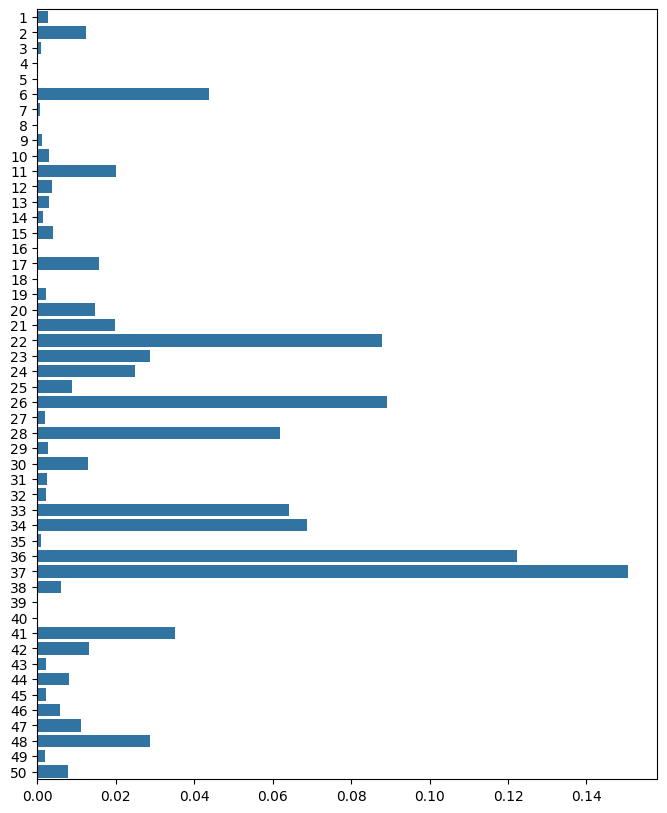

In [28]:
import seaborn as sns
from matplotlib.pylab import rcParams
%matplotlib inline

# making colums name
c_name = [str(i) for i in range(1, 51)]

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(xg_cl.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(c_name, xg_cl.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

rcParams['figure.figsize'] = 8, 10
# feature importance 시각화
sns.barplot(x=xg_cl.feature_importances_, y=c_name)

In [7]:
num = 5
temp = xg_cl.feature_importances_
indices = np.argsort(temp)[-num:]

# Get the top 'num' elements
top_elements = temp[indices]

print("Top elements:", top_elements)
print("Indices:", indices)

Top elements: [0.06808666 0.10446674 0.10592666 0.12132227 0.12684524]
Indices: [32 36 35 21  5]


## decision tree

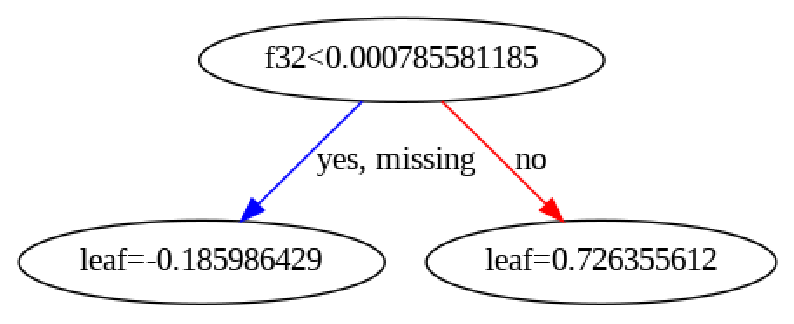

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_tree(xg_cl,num_trees=0, ax=ax)
plt.show()

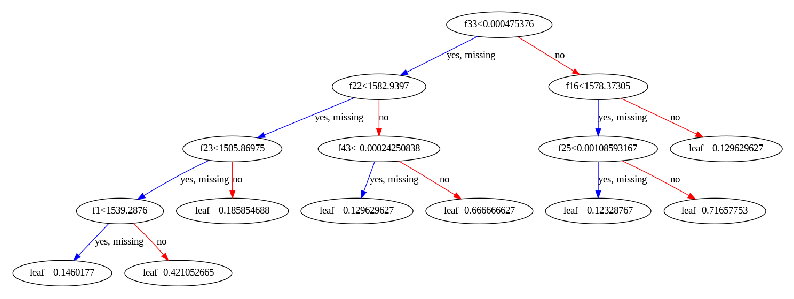

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_tree(xg_cl,num_trees=1, ax=ax)
plt.show()

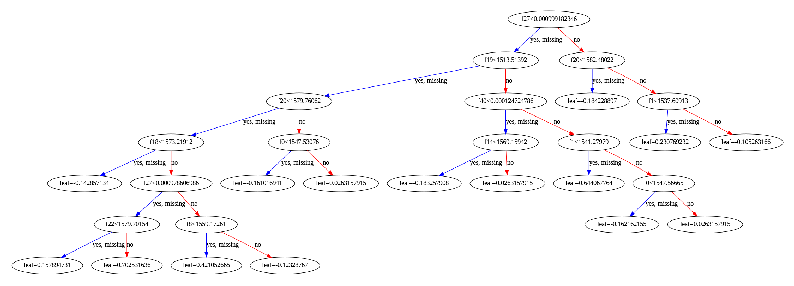

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_tree(xg_cl,num_trees=2, ax=ax)
plt.show()

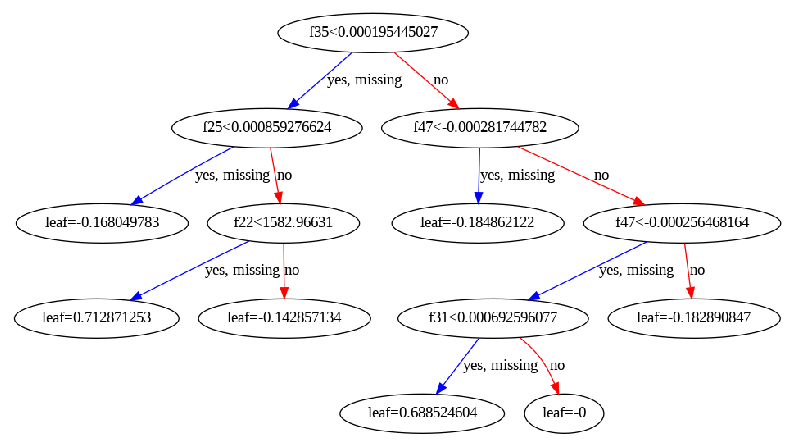

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_tree(xg_cl,num_trees=3, ax=ax)
plt.show()

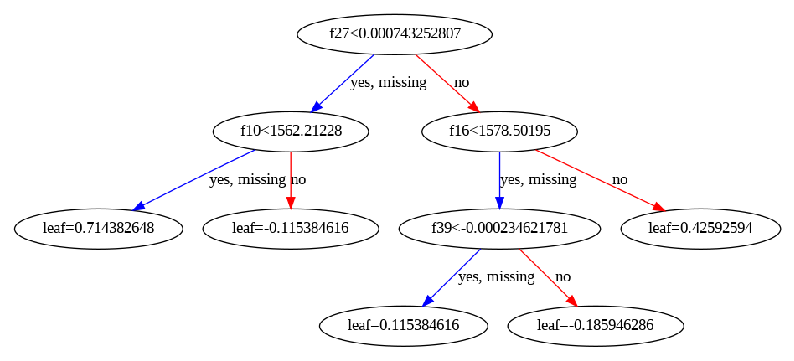

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_tree(xg_cl,num_trees=4, ax=ax)
plt.show()

## info plots

In [8]:
# making Dataframe
existing_df = pd.DataFrame(data, columns=c_name)

In [9]:
existing_df['label'] = label

In [32]:
from IPython.display import display
import pdpbox as pdp
from pdpbox import info_plots
pima_target = existing_df.columns[50]

pima_features = existing_df['label'].to_numpy()

target_plot = info_plots.TargetPlot(
            df = existing_df,
            feature = '32',
            feature_name = '32',
            target = pima_target)

# Explicitly show the plot
target_plot.plot()

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/pdpbox/utils.py:215: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/pdpbox/utils.py:221: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

